In [4]:
import bisect
import matplotlib.pyplot as plt
from itertools import accumulate
from random import randint, random, choices

In [20]:
def init_population(n): # Initialize Population for 1st Generation
    individu = []
    for i in range(n):
        individu.append([randint(0,1), randint(0,1), randint(0,1), randint(0,1), randint(0,1), randint(0,1), randint(0,1)])
    return individu

def evaluation(): # Calculate Fitness Function of Individu
    F_Obj = []
    W_Obj = []
    for i in range(n):
        F_Obj.append(sum(x * y for x, y in zip(individu[i], benefit)))
        W_Obj.append(sum(x * y for x, y in zip(individu[i], weight)))
    F_Obj = [a if b <= 22 else 0 for a, b in zip(F_Obj, W_Obj)]
    return F_Obj

def selection(): # Selection of Parents for Crossover using Roulette Wheel Method
    Prob = [x / sum(F_Obj) for x in F_Obj]
    Cumulative_Prob = list(accumulate(Prob))
    R = [random() for _ in range(20)]
    old_individu = individu.copy()
    for i in range(n):
        new_index = bisect.bisect_left(Cumulative_Prob, R[i])
        individu[i] = old_individu[new_index]
    return individu

def crossover(crossover_rate): # Produce Offsprings with One-Point Crossover (Point of Crossover = 3)
    offspring_total = crossover_rate * n
    parent = choices(individu, k = int(offspring_total))
    offspring = []
    for i in range(0, int(offspring_total), 2):
        offspring.append(parent[i][:3] + parent[i+1][3:])
        offspring.append(parent[i+1][:3] + parent[i][3:])
    return offspring

def mutation(mutation_rate): # Genetic Mutation for Offspring (Randomly Decided)
    mutation_total = int(mutation_rate * n * len(offspring[0]))
    old_offspring = offspring.copy()
    for i in range(0,mutation_total):
        a = randint(0, len(offspring)-1) 
        b = randint(0, len(offspring[0])-1)
        offspring[a][b] = int(not(old_offspring[a][b]))
    return offspring

def elitism(a,b): # Determine the Individu for Next Generation Population
    for i in range(len(b)):
        a[i] = b[i]
    return individu


In [33]:
n,x=map(int,input('Enter Number of Population and Generation : ').split())

benefit = [5, 8, 3, 2, 7, 9, 4]
weight = [7, 8, 4, 10, 4, 6, 4]
plot_generation = []
plot_f_obj = []

Enter Number of Population and Generation : 20 15


Result of Generation 1 :
Best Individu + Objective Function : [0, 1, 1, 0, 0, 1, 1] 24
-----------------------------------------------------------------
Result of Generation 2 :
Best Individu + Objective Function : [0, 1, 1, 0, 0, 1, 1] 24
-----------------------------------------------------------------
Result of Generation 3 :
Best Individu + Objective Function : [0, 1, 1, 0, 0, 1, 1] 24
-----------------------------------------------------------------
Result of Generation 4 :
Best Individu + Objective Function : [0, 1, 1, 0, 0, 1, 1] 24
-----------------------------------------------------------------
Result of Generation 5 :
Best Individu + Objective Function : [0, 1, 1, 0, 1, 1, 0] 27
-----------------------------------------------------------------
Result of Generation 6 :
Best Individu + Objective Function : [0, 1, 1, 0, 1, 1, 0] 27
-----------------------------------------------------------------
Result of Generation 7 :
Best Individu + Objective Function : [0, 1, 1, 0, 1, 1, 0

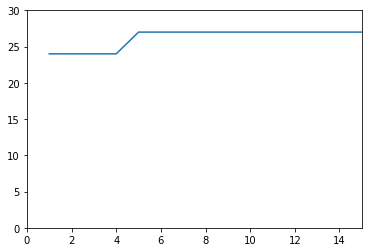

In [34]:
if __name__ == '__main__':
    individu = init_population(n)
    for i in range(x):
        F_Obj = evaluation()
        individu = selection()
        F_Obj = evaluation()
        individu = [x for (y,x) in sorted(zip(F_Obj,individu), key=lambda pair: pair[0])]
        offspring = crossover(0.8)
        offspring = mutation(0.05)
        individu = elitism(individu,offspring)
        F_Obj = evaluation()
        best_individu = [x for (y,x) in sorted(zip(F_Obj,individu), key=lambda pair: pair[0], reverse= True)]
        print('Result of Generation', i+1 , ':')
        print('Best Individu + Objective Function :', best_individu[0], sorted(F_Obj, reverse=True)[0])
        print('-----------------------------------------------------------------')
        plot_generation.append(i+1)
        plot_f_obj.append(sorted(F_Obj, reverse=True)[0])
    plt.plot(plot_generation, plot_f_obj)
    plt.axis([0, 15, 0, 30])
    plt.show()